# Without Animation

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def read_all_iterations_from_file(filename):
    """Reads all iterations from a text file and returns a list of NumPy arrays."""
    with open(filename, 'r') as file:
        all_iterations = []
        current_grid = []
        for line in file:
            # Check if line starts a new iteration
            if line.startswith("Iteration"):
                # If there's a current grid, add it to all_iterations and start a new grid
                if current_grid:
                    all_iterations.append(np.array(current_grid))
                    current_grid = []
            else:
                # Add row to current grid
                row = [int(x) for x in line.split()]
                current_grid.append(row)
        # Add the last grid to all_iterations
        if current_grid:
            all_iterations.append(np.array(current_grid))
    return all_iterations

def plot_all_iterations(all_iterations):
    """Plots all iterations."""
    for i, grid in enumerate(all_iterations):
        if grid.size == 0:
            print(f"Iteration {i+1} is empty. Cannot plot.")
            continue
        plt.imshow(grid, cmap='Greys', interpolation='nearest')
        plt.title(f'Iteration {i+1}')
        plt.colorbar(label='Cell State')
        plt.show()

# Example Usage
filename = '2D_Periodic_Moore.txt'  
all_iterations = read_all_iterations_from_file(filename)
plot_all_iterations(all_iterations)


FileNotFoundError: [Errno 2] No such file or directory: '2D_Periodic_Moore.txt'

## Attempt at Animating These -- Not Working Yet

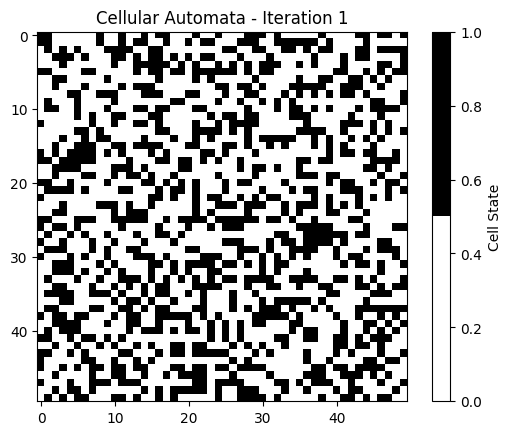

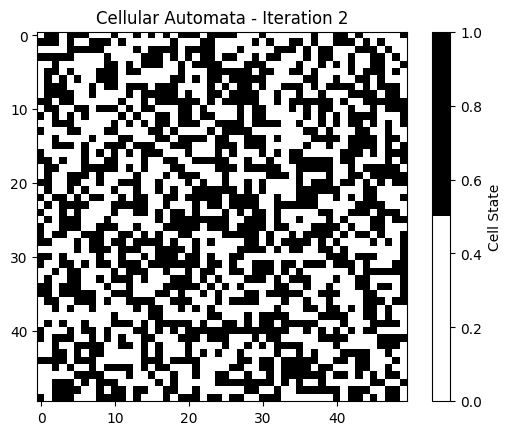

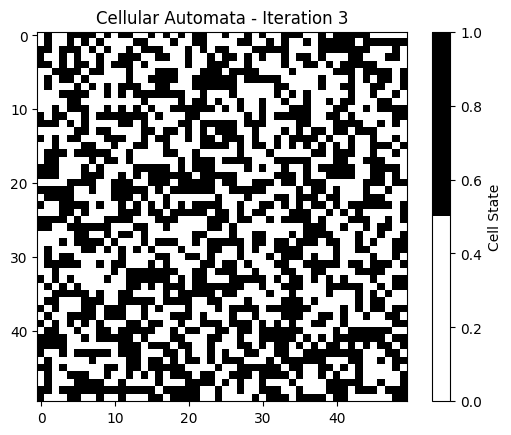

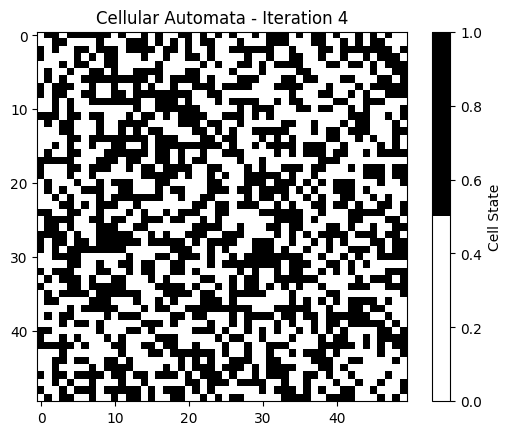

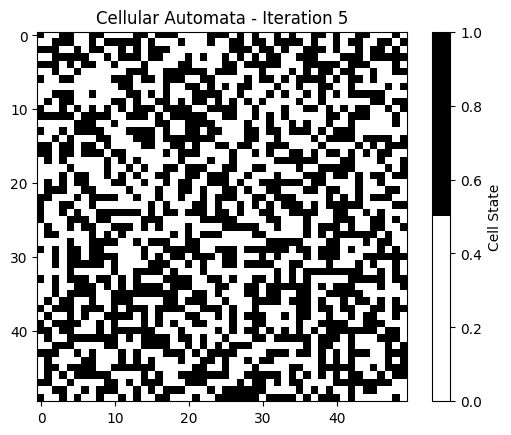

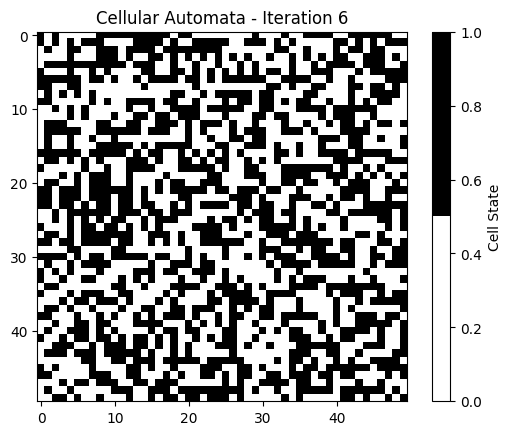

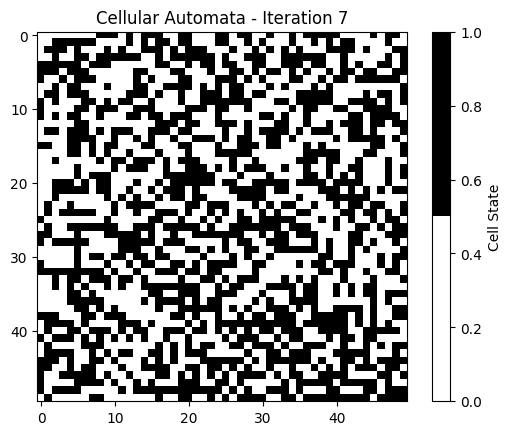

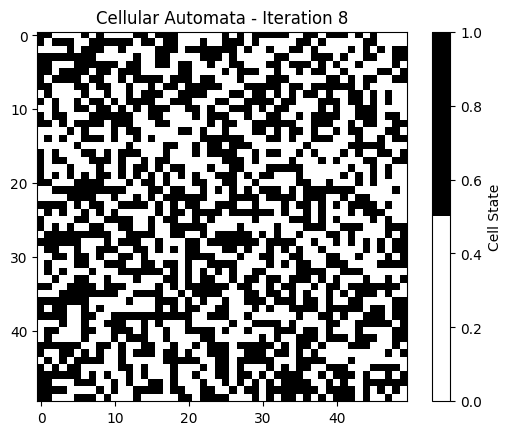

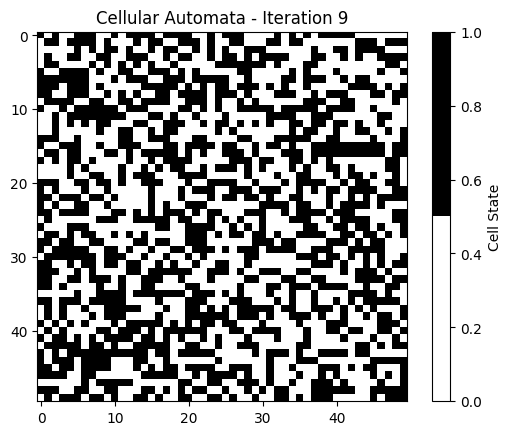

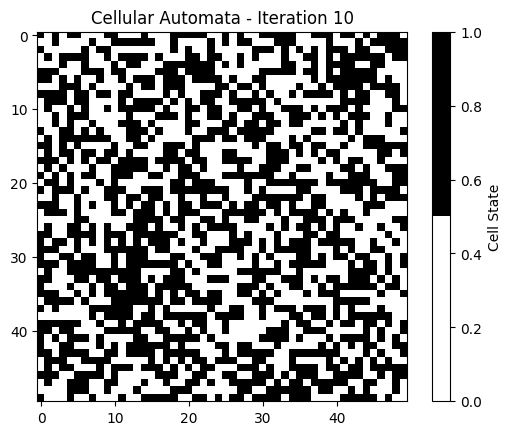

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define Grid Dimensions, Boundary Conditions, and Neighborhood Types
GridDimension = {'OneD': 1, 'TwoD': 2}
BoundaryCondition = {'Fixed': 0, 'Periodic': 1, 'NoBoundary': 2}
NeighborhoodType = {'Moore': 0, 'VonNeumann': 1}

# Rules as defined in the C++ code
def majorityRule(neighbors, currentState):
    return 1 if neighbors > 4 else 0

def totalisticRule(neighbors, currentState):
    return 1 if neighbors == 3 else 0

def parityRule(neighbors, currentState):
    return 1 if neighbors % 2 == 0 else 0

# Calculate Neighbors for 2D Grid
def calculateNeighbors2D(grid, i, j, bc, nt):
    neighbors = 0
    size = grid.shape[0]
    for di in range(-1, 2):
        for dj in range(-1, 2):
            if di == 0 and dj == 0:
                continue
            if nt == NeighborhoodType['VonNeumann'] and abs(di) + abs(dj) > 1:
                continue

            ni, nj = (i + di), (j + dj)

            # Apply boundary conditions
            if bc == BoundaryCondition['Periodic']:
                ni, nj = ni % size, nj % size
            elif bc == BoundaryCondition['Fixed']:
                if ni < 0 or ni >= size or nj < 0 or nj >= size:
                    continue
            elif bc == BoundaryCondition['NoBoundary']:
                if ni < 0 or ni >= size or nj < 0 or nj >= size:
                    neighbors += currentState
                    continue

            neighbors += grid[ni, nj]
    return neighbors

# Initialize a 2D grid
def initializeGrid(size, init_prob=0.4):
    return np.random.choice([0, 1], size=(size, size), p=[1-init_prob, init_prob])

# Apply rules to the grid
def applyRules(grid, ruleFunc, bc, nt):
    new_grid = np.zeros_like(grid)
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            neighbors = calculateNeighbors2D(grid, i, j, bc, nt)
            new_grid[i, j] = ruleFunc(neighbors, grid[i, j])
    return new_grid

# Display the grid
def displayGrid(grid, title):
    cmap = ListedColormap(['white', 'black'])  # Modify for your color scheme
    plt.imshow(grid, cmap=cmap)
    plt.title(title)
    plt.colorbar(label='Cell State')
    plt.show()

# Example Usage
size = 50  # Grid size
grid = initializeGrid(size)
iterations = 10
boundary_condition = BoundaryCondition['Periodic']
neighborhood_type = NeighborhoodType['Moore']

for i in range(iterations):
    displayGrid(grid, f"Cellular Automata - Iteration {i+1}")
    grid = applyRules(grid, parityRule, boundary_condition, neighborhood_type)


# Use This -- Animation Attempt with Imageio

In [8]:
import imageio.v2 as imageio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from io import BytesIO

# Function to read all iterations from a file
def read_all_iterations_from_file(filename):
    all_iterations = []
    current_grid = []
    with open(filename, 'r') as file:
        for line in file:
            if line.strip().startswith("Iteration"):
                if current_grid:
                    all_iterations.append(np.array(current_grid))
                    current_grid = []
                continue
            row = [int(x) for x in line.split()]
            current_grid.append(row)
        if current_grid:
            all_iterations.append(np.array(current_grid))
    return all_iterations

# Function to convert a grid to an image
def grid_to_image(grid, cmap):
    fig, ax = plt.subplots()
    ax.imshow(grid, cmap=cmap, interpolation='nearest')
    ax.axis('off')

    # Save the plot to a BytesIO object
    buf = BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
    buf.seek(0)
    image = imageio.imread(buf)
    buf.close()
    plt.close(fig)
    return image

# Function to create a GIF from all iterations
def create_gif(all_iterations, filename, cmap, desired_fps=60):  # Increase desired_fps for faster animation
    images = [grid_to_image(grid, cmap) for grid in all_iterations]
    imageio.mimsave(filename, images, duration=1000 / desired_fps, loop=0)  # Loop the GIF indefinitely

# Color map
cmap = ListedColormap(['yellow', 'blue'])  # Modify for your color scheme

# File names
file_names = [
    "2D_Periodic_Moore_majority.txt",
    "2D_Fixed_Moore.txt",
    "2D_NoBoundary_Moore.txt",
    "2D_Periodic_Moore_totalistic.txt",
    "2D_Fixed_Moore_totalistic.txt",
    "2D_Periodic_Moore_parity.txt",
    "2D_Fixed_Moore_parity.txt",
    "2D_NoBoundary_Moore_paity.txt",
    "1D_Periodic_VN_parity.txt",
    "1D_Fixed_VN_parity.txt",
    "1D_NoBoundary_VN_parity.txt",
    "1D_Periodic_VN_totalistic.txt"
    
]

# Create and save GIFs
for file_name in file_names:
    all_iterations = read_all_iterations_from_file(file_name)
    gif_filename = f"{file_name.split('.')[0]}.gif"
    create_gif(all_iterations, gif_filename, cmap, desired_fps=1)
    print(f"Saved {gif_filename}")


Saved 2D_Periodic_Moore_majority.gif
Saved 2D_Fixed_Moore.gif


FileNotFoundError: [Errno 2] No such file or directory: '2D_NoBoundary_Moore.txt'